## CIFO Project

### Imports

In [1]:
#pip install opencv-python

In [2]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

### Download Image

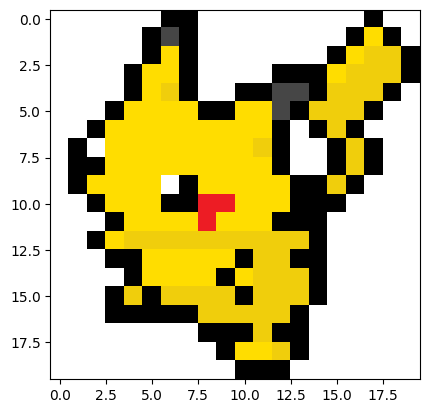

In [3]:
image = mpimg.imread('Pikachu.png')
plt.imshow(image)

In [4]:
image.shape

(20, 20, 4)

We hava an image with the following properties:

- 20 pixels of heigth
- 20 pixels of width

We will now get the RGB matrix of our image, since cv2 uses BGR instead, we will need to make a transformation on the matrix 

In [5]:
pixelGrid = cv2.imread('Pikachu.png')
pixelGrid = cv2.cvtColor(pixelGrid, cv2.COLOR_BGR2RGB)

Let's check the first row of our pixel grid

In [6]:
pixelGrid[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [  0,   0,   0],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

We can see that we have:
- 6 white pixels
- 2 black pixels
- 9 white pixels
- 1 black pixel
- 2 white piexels

Resulting in a total of 20 pixels per row and 400 total pixels

For a matter of simplicity, we will create a function to retrieve the grid of any image

In [7]:
def getOriginalGrid(img):
    pixelGrid = cv2.imread(img)
    pixelGrid = cv2.cvtColor(pixelGrid, cv2.COLOR_BGR2RGB)
    return pixelGrid

In [8]:
getOriginalGrid('Pikachu.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 221,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [240, 206,  12],
        [240, 206,  12],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Initial Population

Our search space is huge, if we imagine that we have 256 * 256 * 256 = 16 777 216 different combinations of pixels * 400 pixels in our image, our search space as a total of 6 710 886 400 different solutions.

Therefore our initial population will be a random plausible solution.

In [9]:
def initialPopulation(img, size):

    population = []

    for i in range(size):
        element = getOriginalGrid(img).copy()
        for row in range(len(element)):
            for column in range(len(element[0])):
                for value in range(len(element[0][0])):
                    element[row][column][value] = random.randint(0, 255)
        population.append(element)

    return population

In [10]:
population = initialPopulation('Pikachu.png', 5)

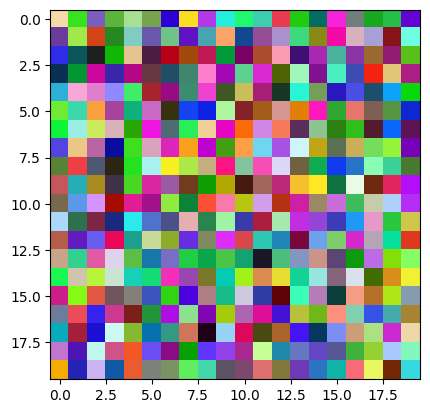

In [11]:
plt.imshow(population[0])

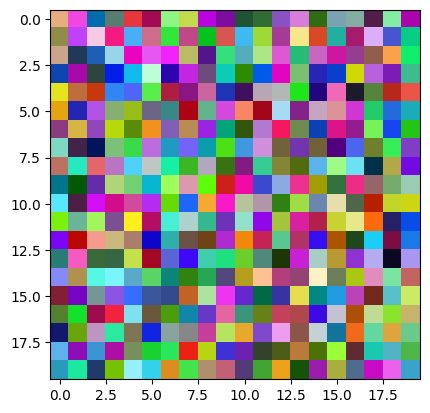

In [12]:
plt.imshow(population[1])

## Fitness Function

### Euclidean Distance

In [13]:
def getPixelFitnessEuclidean(pixel, target):
    return math.sqrt((int(pixel[0])- int(target[0]))**2 + (int(pixel[1]) - int(target[1]))**2 + (int(pixel[2]) - int(target[2]))**2)

In [14]:
getPixelFitnessEuclidean([123, 54, 234], [130, 2, 200])

62.52199612936234

In [15]:
getPixelFitnessEuclidean([0, 0, 0], [0, 0, 0])

0.0

### Squared Euclidean Distance

In [16]:
def getPixelFitnessSquaredEuclidean(pixel, target):
    return math.sqrt((int(pixel[0])- int(target[0]))**2 + (int(pixel[1]) - int(target[1]))**2 + (int(pixel[2]) - int(target[2]))**2)**2

In [17]:
getPixelFitnessSquaredEuclidean([123, 54, 234], [130, 2, 200])

3908.9999999999995

In [18]:
getPixelFitnessSquaredEuclidean([0, 0, 0], [0, 0, 0])

0.0

### Manhattan Distance

In [19]:
def getPixelFitnessManhattan(pixel, target):
    return abs(int(pixel[0]) - int(target[0])) + abs(int(pixel[1]) - int(target[1])) + abs(int(pixel[2]) - int(target[2]))

In [20]:
getPixelFitnessManhattan([123, 54, 234], [130, 2, 200])

93

In [21]:
getPixelFitnessManhattan([0, 0, 0], [0, 0, 0])

0

### Squared Manhattan Distance

In [22]:
def getPixelFitnessSquaredManhattan(pixel, target):
    return abs(int(pixel[0]) - int(target[0])) + abs(int(pixel[1]) - int(target[1])) + abs(int(pixel[2]) - int(target[2]))**2

In [23]:
getPixelFitnessSquaredManhattan([123, 54, 234], [130, 2, 200])

1215

In [24]:
getPixelFitnessSquaredManhattan([0, 0, 0], [0, 0, 0])

0

### Total Fitness

In [25]:
def getFitness(element, original, fitnessFunction):

    totalFitness = 0

    for row in range(len(element)):
        for column in range(len(element[0])):
            totalFitness = totalFitness + fitnessFunction(element[row][column], original[row][column])
    
    return totalFitness

In [26]:
getFitness(population[0], pixelGrid, getPixelFitnessEuclidean)

94607.37501075547

In [27]:
getFitness(population[0], pixelGrid, getPixelFitnessSquaredEuclidean)

24527769.0

In [28]:
getFitness(population[0], pixelGrid, getPixelFitnessManhattan)

146745

In [29]:
getFitness(population[0], pixelGrid, getPixelFitnessSquaredManhattan)

8220281

## Crossover

### Half-Change Crossover

In [30]:
def halfChangeCrossover(pixel1, pixel2, crossoverProb = 0.8):

    if random.random() <= crossoverProb:
        R_index = random.randint(1, 100)
        G_index = random.randint(1, 100)
        B_index = random.randint(1, 100)

        if R_index <= 50:
            temp = pixel1[0]
            pixel1[0] = pixel2[0]
            pixel2[0] = temp

        if G_index <= 50:
            temp = pixel1[1]
            pixel1[1] = pixel2[1]
            pixel2[1] = temp

        if B_index <= 50:
            temp = pixel1[2]
            pixel1[2] = pixel2[2]
            pixel2[2] = temp
   
    return pixel1, pixel2

In [31]:
halfChangeCrossover([1,2,3], [4,5,6])

([4, 5, 6], [1, 2, 3])

### Single-Point Crossover

In [32]:
def singlePointCrossover(pixel1, pixel2, crossoverProb=0.8):
    if random.random() < crossoverProb:
        crossoverPoint = random.randint(1, 2)
        
        if crossoverPoint == 1:
            temp = pixel1[1]
            pixel1[1] = pixel2[1]
            pixel2[1] = temp

        temp = pixel1[2]
        pixel1[2] = pixel2[2]
        pixel2[2] = temp

    return pixel1, pixel2

In [33]:
singlePointCrossover([1,2,3], [4,5,6])

([1, 2, 3], [4, 5, 6])

### Arithmetic Crossover

In [34]:
def arithmeticCrossover(pixel1, pixel2, alpha=0.5, crossoverProb=0.8):

    if random.random() <= crossoverProb:
        pixel1, pixel2 = [round(alpha * pixel1[0] + (1 - alpha) * pixel2[0]), round(alpha * pixel1[1] + (1 - alpha) * pixel2[1]), round(alpha * pixel1[2] + (1 - alpha) * pixel2[2])], [round((1 - alpha) * pixel1[0] + alpha * pixel2[0]), round((1 - alpha) * pixel1[1] + alpha * pixel2[1]), round((1 - alpha) * pixel1[2] + alpha * pixel2[2])]
    
    return pixel1, pixel2

In [35]:
arithmeticCrossover([1,2,3], [4,5,6])

([1, 2, 3], [4, 5, 6])

In [36]:
arithmeticCrossover([1,2,3], [4,5,6], 0.7)

([2, 3, 4], [3, 4, 5])

Higher alpha would mean that offspring are closer to pixel1

## Mutation

### Uniform Mutation

In [37]:
def uniformMutation(pixel, mutationProb=0.05):

    if random.random() <= mutationProb:
        for i in range(len(pixel)):
            pixel[i] = random.randint(0, 255)

    return pixel

In [38]:
uniformMutation([1,2,3])

[1, 2, 3]

### Shuffle Mutation

In [39]:
def shuffleMutation(pixel, mutationProb=0.05):

    shuffledPixel = pixel[:]

    if random.random() <= mutationProb:
        random.shuffle(shuffledPixel)
    return shuffledPixel

In [40]:
shuffleMutation([1,2,3])

[1, 2, 3]

## Seletion

### Roulette Selection

In [41]:
import numpy.random as npr
def rouletteSelection(population, original, getFitness, function):
    
    totalFitnesses = sum([getFitness(element, original, function) for element in population])

    selectionProbs = [1 - getFitness(element, original, function)/totalFitnesses for element in population]

    selectionProbs = [prob / sum(selectionProbs) for prob in selectionProbs]

    newPopulation = []

    for _ in range(len(population)):
        newPopulation.append(population[npr.choice(len(population), p=selectionProbs)])

    return newPopulation

In [42]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94607.37501075547
95391.40455304361
94192.63785088803
94241.62942059762
94617.70581838116


In [43]:
newPopulation = rouletteSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94617.70581838116
94241.62942059762
94241.62942059762
94241.62942059762
94241.62942059762


### Rank Selection

In [44]:
def rankSelection(population, original, getFitness, function):
    
    fitnesses = [getFitness(element, original, function) for element in population]

    for i in range(len(fitnesses)):
        fitnesses[fitnesses.index(max(fitnesses))] = i + 1

    selectionProbs = [rank / sum(fitnesses) for rank in fitnesses]

    newPopulation = []

    for _ in range(len(population)):
        newPopulation.append(population[npr.choice(len(population), p=selectionProbs)])

    return newPopulation

In [45]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94607.37501075547
95391.40455304361
94192.63785088803
94241.62942059762
94617.70581838116


In [46]:
newPopulation = rankSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94241.62942059762
94241.62942059762
94241.62942059762
94241.62942059762
94192.63785088803


### Tournament Selection

In [54]:
def tournamentSelection(population, original, getFitness, function, size=20):

    newPopulation = []

    for _ in range(len(population)):

        tournament = []

        for _ in range(size):
            tournament.append(population[random.randint(0, len(population)-1)])

        tournamentFitnesses = [getFitness(element, original, function) for element in tournament]

        newPopulation.append(tournament[tournamentFitnesses.index(min(tournamentFitnesses))])

    return newPopulation

In [48]:
for element in population:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94607.37501075547
95391.40455304361
94192.63785088803
94241.62942059762
94617.70581838116


In [49]:
newPopulation = tournamentSelection(population, pixelGrid, getFitness, getPixelFitnessEuclidean)

for element in newPopulation:
    print(getFitness(element, pixelGrid, getPixelFitnessEuclidean))

94192.63785088803
94192.63785088803
94192.63785088803
94192.63785088803
94192.63785088803


## Genetic Algorithm

In [50]:
def initialize(img, populationSize):
    originalGrid = getOriginalGrid(img)
    population = initialPopulation(img, populationSize)
    return originalGrid, population

In [60]:
def geneticAlgorithm(population, original, fitness, crossover, mutation, selection, numberGenerations=1000, crossoverProb = 0.8, mutationProb = 0.01, elitism=True):
    
    df = pd.DataFrame(columns=['generation', 'fitness'])
    
    for generation in range(numberGenerations + 1):

        selectedPopulation = selection(population, original, getFitness, fitness)

        newPopulation = []

        for i in range(0, len(selectedPopulation), 2):
            parent1, parent2 = selectedPopulation[i], selectedPopulation[min(i+1, len(selectedPopulation)-1)]
            child1, child2 = parent1.copy(), parent2.copy()

        for row in range(len(parent1)):
            for col in range(len(parent1[0])):
                child1[row][col], child2[row][col] = crossover(parent1[row][col], parent2[row][col], crossoverProb=crossoverProb)
                child1[row][col] = mutation(child1[row][col], mutationProb=mutationProb)
                child2[row][col] = mutation(child2[row][col], mutationProb=mutationProb)
        newPopulation.append(child1)
        newPopulation.append(child2)

        population = newPopulation.copy()

        if elitism and generation >  0:
            population[fitnesses.index(max(fitnesses))] = bestElement.copy()

        fitnesses = [getFitness(element, original, fitness) for element in population]

        bestElement = population[fitnesses.index(min(fitnesses))].copy()

        if generation % 100 == 0:
            print("Generation:", generation)
            print("Best Fitness:", fitnesses[fitnesses.index(min(fitnesses))])

        df.loc[generation] = [generation, fitnesses[fitnesses.index(min(fitnesses))]]

    return bestElement, df

Generation: 0
Best Fitness: 91367.42846758824
Generation: 100
Best Fitness: 85622.67723767647
Generation: 200
Best Fitness: 82326.21558016936
Generation: 300
Best Fitness: 79273.11025060852
Generation: 400
Best Fitness: 76871.29845850325
Generation: 500
Best Fitness: 75562.66514463446
Generation: 600
Best Fitness: 73726.7648291648
Generation: 700
Best Fitness: 72848.46120026946
Generation: 800
Best Fitness: 70850.21086778677
Generation: 900
Best Fitness: 69848.27205733437
Generation: 1000
Best Fitness: 69031.57866773175


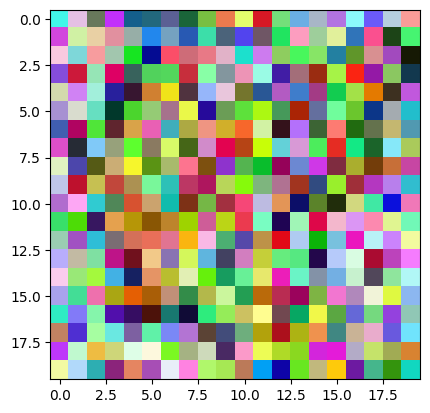

In [70]:
Initialization = initialize("Pikachu.png", 50)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=singlePointCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

dataframe = GA[1]
plt.imshow(GA[0])

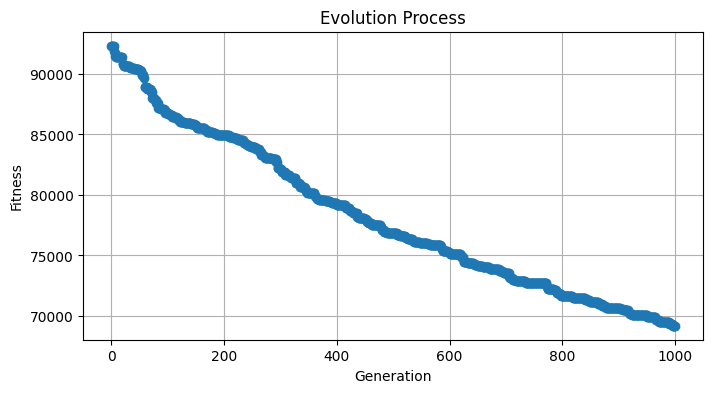

In [62]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(dataframe['generation'], dataframe['fitness'], marker='o')

# Add titles and labels
plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

# Show the plot
plt.grid(True)
plt.show()

Generation: 0
Best Fitness: 90917.60680955542
Generation: 100
Best Fitness: 86754.08501363042
Generation: 200
Best Fitness: 83781.81180914618
Generation: 300
Best Fitness: 80425.79561630049
Generation: 400
Best Fitness: 77911.7817957177
Generation: 500
Best Fitness: 76707.68793493217
Generation: 600
Best Fitness: 74744.19356994942
Generation: 700
Best Fitness: 73227.18273873771
Generation: 800
Best Fitness: 71378.0685208678
Generation: 900
Best Fitness: 70802.38297508762
Generation: 1000
Best Fitness: 70019.3581532924


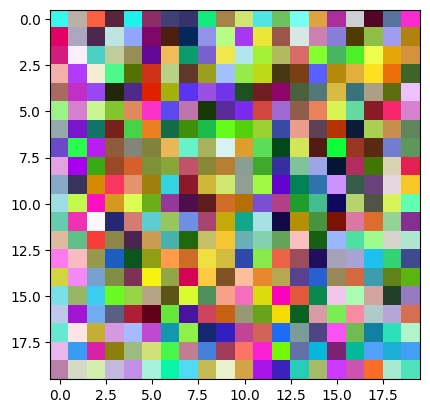

In [66]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=halfChangeCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

dataframe = GA[1]
plt.imshow(GA[0])

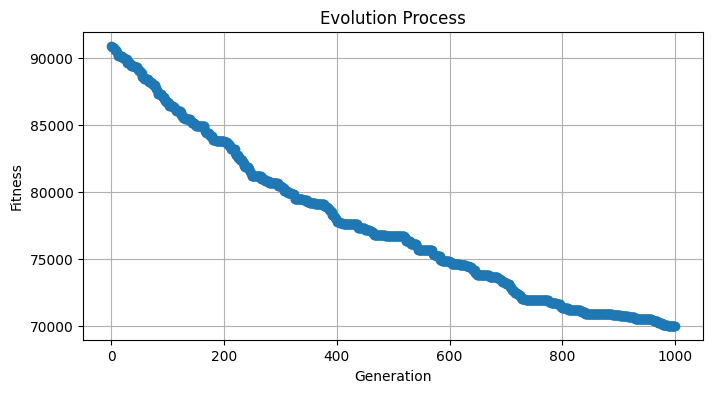

In [67]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(dataframe['generation'], dataframe['fitness'], marker='o')

# Add titles and labels
plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

# Show the plot
plt.grid(True)
plt.show()

Generation: 0
Best Fitness: 86981.82082506258
Generation: 100
Best Fitness: 83510.96962910313
Generation: 200
Best Fitness: 81580.86126730847
Generation: 300
Best Fitness: 77654.55047869019
Generation: 400
Best Fitness: 75520.73816034358
Generation: 500
Best Fitness: 74446.27546555107
Generation: 600
Best Fitness: 73442.02478673916
Generation: 700
Best Fitness: 72743.76385287789
Generation: 800
Best Fitness: 71648.45643914446
Generation: 900
Best Fitness: 70472.56481832646
Generation: 1000
Best Fitness: 69943.3573375473


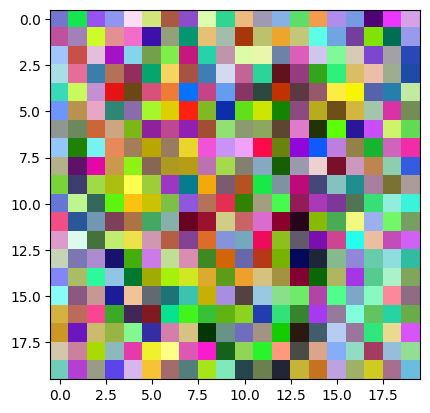

In [64]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=1000)

dataframe = GA[1]
plt.imshow(GA[0])

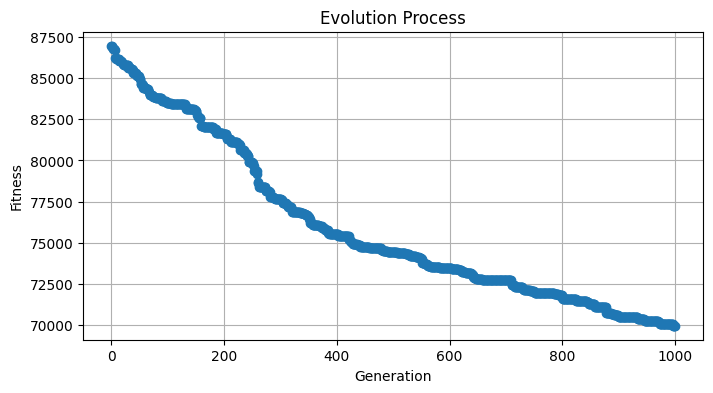

In [65]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(dataframe['generation'], dataframe['fitness'], marker='o')

# Add titles and labels
plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

# Show the plot
plt.grid(True)
plt.show()

### Best Model

Generation: 0
Best Fitness: 87889.57825835333
Generation: 100
Best Fitness: 84885.63719613668
Generation: 200
Best Fitness: 82450.44486812329
Generation: 300
Best Fitness: 80443.10017553196
Generation: 400
Best Fitness: 79150.72386719406
Generation: 500
Best Fitness: 77267.8557401327
Generation: 600
Best Fitness: 75863.10362247718
Generation: 700
Best Fitness: 74578.14328282699
Generation: 800
Best Fitness: 73364.68768356905
Generation: 900
Best Fitness: 71587.3517143753
Generation: 1000
Best Fitness: 70386.34487735595
Generation: 1100
Best Fitness: 69207.81487441264
Generation: 1200
Best Fitness: 68405.4281199659
Generation: 1300
Best Fitness: 67446.51073801436
Generation: 1400
Best Fitness: 67047.12566501932
Generation: 1500
Best Fitness: 65898.68303411962
Generation: 1600
Best Fitness: 65407.82823917141
Generation: 1700
Best Fitness: 64983.66826725875
Generation: 1800
Best Fitness: 64286.2917206157
Generation: 1900
Best Fitness: 63641.5605656525
Generation: 2000
Best Fitness: 63152.

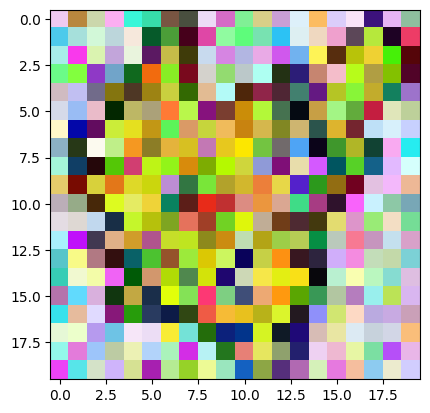

In [68]:
Initialization = initialize("Pikachu.png", 100)

originalGrid = Initialization[0]
population = Initialization[1]

GA = geneticAlgorithm(population=population, original=originalGrid, fitness=getPixelFitnessEuclidean, crossover=arithmeticCrossover, mutation=uniformMutation, selection=tournamentSelection, numberGenerations=10000)

dataframe = GA[1]
plt.imshow(GA[0])

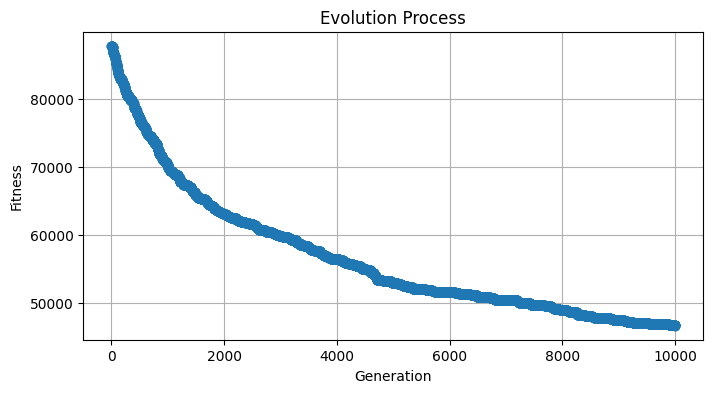

In [69]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(dataframe['generation'], dataframe['fitness'], marker='o')

# Add titles and labels
plt.title('Evolution Process')
plt.xlabel('Generation')
plt.ylabel('Fitness')

# Show the plot
plt.grid(True)
plt.show()